
# AQUACROP irrigation synthetic dataset 
This example demonstrates how to load and visualize datasets related to
evapotranspiration (ETa) and land cover classification (CLC) for a synthetic dataset generated using AQUACROP.
The datasets are loaded using Pooch for remote file management.
Two visualizations are created: one showing land cover classification (CLC) and
another displaying the time series of evapotranspiration (ETa).


In [1]:
import pooch
import xarray as xr 
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

Step 1: Download datasets using Pooch
Pooch is used to manage the dataset downloads from the specified GitHub repository.



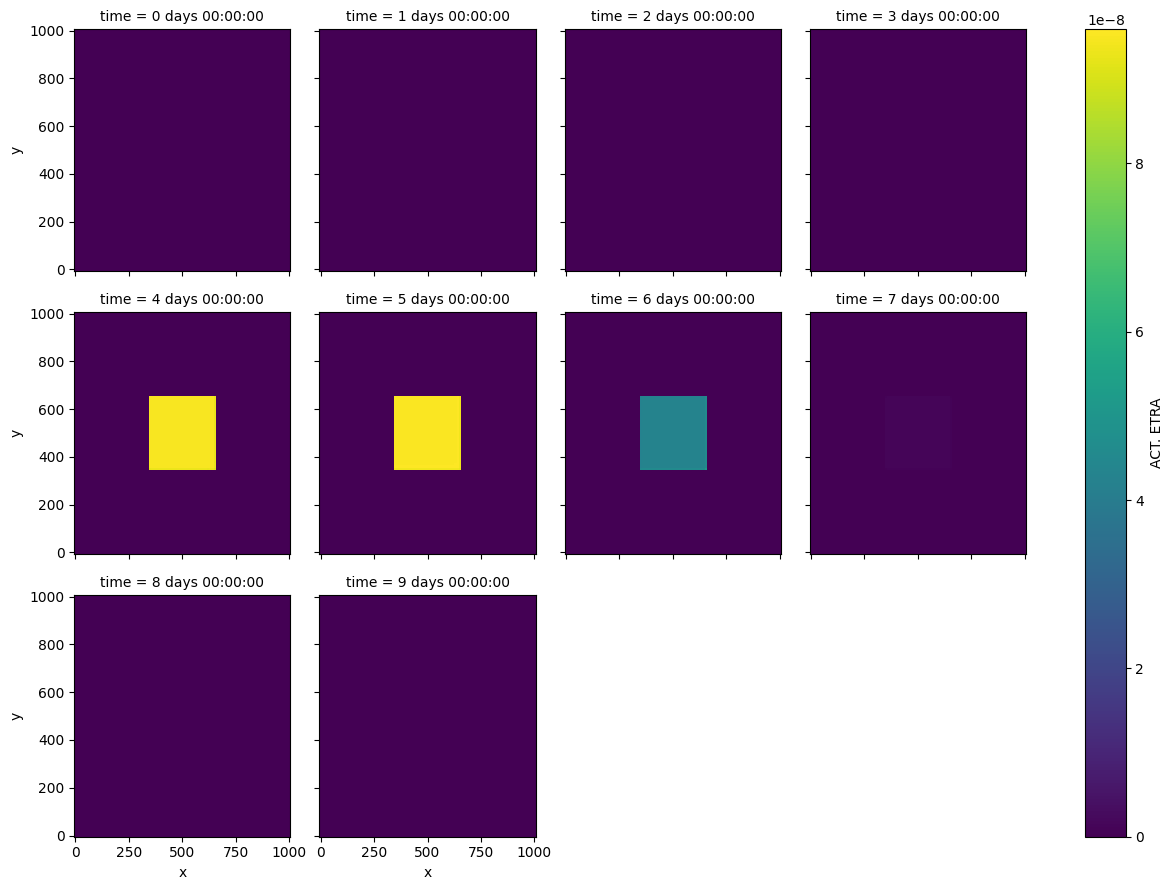

In [2]:
pooch_Majadas = pooch.create(
    path=pooch.os_cache("AQUACROP_project"),
    base_url="https://github.com/BenjMy/test_AQUACROP_centum_dataset/raw/refs/heads/main/",
    registry={
        "ds_analysis_EO_0.netcdf": None,
    },
)

AQUACROP_ET_filename = pooch_Majadas.fetch('ds_analysis_EO_0.netcdf')
AQUACROP_ds = xr.load_dataset(AQUACROP_ET_filename)

# AQUACROP_ds = xr.open_dataset(f'../data/synthetic/ds_analysis_EO_0.netcdf')

import numpy as np
_, index = np.unique(AQUACROP_ds['time'], return_index=True)
AQUACROP_ds = AQUACROP_ds.isel(time=index)
AQUACROP_ds['ACT. ETRA'].plot.imshow(x="x", y="y", 
                                        col="time", 
                                        col_wrap=4,
                                        )